In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from sqlalchemy import create_engine

In [2]:
#importing data into Panda 
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
mta_dates = [210703,210710,210717,210724,210731,210807,210814,210821,210828,210904]
df = get_data(mta_dates)

In [3]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791
...,...,...,...,...,...,...,...,...,...,...,...
209730,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,05:00:00,REGULAR,5554,638
209731,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,09:00:00,REGULAR,5554,638
209732,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,13:00:00,REGULAR,5554,638
209733,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,17:00:00,REGULAR,5554,638


In [4]:
#see if there is any Nan, all zeros mean there is no Nan.
df.isnull().sum() 

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [5]:
# remove duplicate row that match the combanation of the listed column names
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"], inplace=True)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791
...,...,...,...,...,...,...,...,...,...,...,...
209730,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,05:00:00,REGULAR,5554,638
209731,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,09:00:00,REGULAR,5554,638
209732,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,13:00:00,REGULAR,5554,638
209733,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,17:00:00,REGULAR,5554,638


In [6]:
#get absolute value of nagative entries value
df.ENTRIES = df.ENTRIES.apply(abs)

In [7]:
# replace any Entrie number that higher than 1000000 with 1000000
df.ENTRIES = df.ENTRIES.apply(lambda x: min(1000000,x))

In [8]:
# groupby station name and date assuming that the entries counter got reset daily.
entries_counter = df.groupby([ "STATION", "DATE"]).max()
entries_counter

C/A  UNIT       SCP LINENAME DIVISION      TIME  \
STATION   DATE                                                           
1 AV      06/26/2021  H008  R248  02-05-01        L      BMT  20:00:00   
          06/27/2021  H008  R248  02-05-01        L      BMT  20:00:00   
          06/28/2021  H008  R248  02-05-01        L      BMT  20:00:00   
          06/29/2021  H008  R248  02-05-01        L      BMT  20:00:00   
          06/30/2021  H008  R248  02-05-01        L      BMT  20:00:00   
...                    ...   ...       ...      ...      ...       ...   
ZEREGA AV 08/30/2021  R419  R326  00-05-01        6      IRT  21:00:00   
          08/31/2021  R419  R326  00-05-01        6      IRT  21:00:00   
          09/01/2021  R419  R326  00-05-01        6      IRT  21:00:00   
          09/02/2021  R419  R326  00-05-01        6      IRT  21:00:00   
          09/03/2021  R419  R326  00-05-01        6      IRT  21:00:00   

                         DESC  ENTRIES  \
STATION   DATE                           
1 AV      06/26/2021  REGULAR  1000000   
          06/27/2021  REGULAR  1000000   
          06/28/2021  REGULAR  1000000   
          06/29/2021  REGULAR  1000000   
          06/30/2021  REGULAR  1000000   
...                       ...      ...   
ZEREGA AV 08/30/2021  REGULAR  1000000   
          08/31/2021  REGULAR  1000000   
          09/01/2021  REGULAR  1000000   
          09/02/2021  REGULAR  1000000   
          09/03/2021  REGULAR  1000000   

                      EXITS                                                                 
STATION   DATE                                                                              
1 AV      06/26/2021                                          388156946                     
          06/27/2021                                          388157414                     
          06/28/2021                                          388157850                     
          06/29/2021                                          388158246                     
          06/30/2021                                          388158626                     
...                                                                 ...                     
ZEREGA AV 08/30/2021                                             804899                     
          08/31/2021                                             805690                     
          09/01/2021                                             806435                     
          09/02/2021                                             806528                     
          09/03/2021                                             806647                     

[26500 rows x 9 columns]

In [9]:
# calculate daily entries
entries_counter.ENTRIES = entries_counter.ENTRIES.diff()

In [10]:
# drop first row after diff because it has Nan
entries_counter.dropna(subset=["ENTRIES"], axis=0, inplace=True)
entries_counter

C/A  UNIT       SCP LINENAME DIVISION      TIME  \
STATION   DATE                                                           
1 AV      06/27/2021  H008  R248  02-05-01        L      BMT  20:00:00   
          06/28/2021  H008  R248  02-05-01        L      BMT  20:00:00   
          06/29/2021  H008  R248  02-05-01        L      BMT  20:00:00   
          06/30/2021  H008  R248  02-05-01        L      BMT  20:00:00   
          07/01/2021  H008  R248  02-05-01        L      BMT  20:00:00   
...                    ...   ...       ...      ...      ...       ...   
ZEREGA AV 08/30/2021  R419  R326  00-05-01        6      IRT  21:00:00   
          08/31/2021  R419  R326  00-05-01        6      IRT  21:00:00   
          09/01/2021  R419  R326  00-05-01        6      IRT  21:00:00   
          09/02/2021  R419  R326  00-05-01        6      IRT  21:00:00   
          09/03/2021  R419  R326  00-05-01        6      IRT  21:00:00   

                         DESC  ENTRIES  \
STATION   DATE                           
1 AV      06/27/2021  REGULAR      0.0   
          06/28/2021  REGULAR      0.0   
          06/29/2021  REGULAR      0.0   
          06/30/2021  REGULAR      0.0   
          07/01/2021  REGULAR      0.0   
...                       ...      ...   
ZEREGA AV 08/30/2021  REGULAR      0.0   
          08/31/2021  REGULAR      0.0   
          09/01/2021  REGULAR      0.0   
          09/02/2021  REGULAR      0.0   
          09/03/2021  REGULAR      0.0   

                      EXITS                                                                 
STATION   DATE                                                                              
1 AV      06/27/2021                                          388157414                     
          06/28/2021                                          388157850                     
          06/29/2021                                          388158246                     
          06/30/2021                                          388158626                     
          07/01/2021                                          388159058                     
...                                                                 ...                     
ZEREGA AV 08/30/2021                                             804899                     
          08/31/2021                                             805690                     
          09/01/2021                                             806435                     
          09/02/2021                                             806528                     
          09/03/2021                                             806647                     

[26499 rows x 9 columns]

In [11]:
# make sure there is not negatives
entries_counter.ENTRIES = entries_counter.ENTRIES.apply(abs)

# remove days with zero entries.
entries_counter.query('ENTRIES > 0', inplace=True)

In [16]:
# find daily enties for each station
avg_daily_entries_for_each_station = entries_counter.groupby('STATION').mean()

# sort entries from lower to higher (ascending order)
avg_daily_entries_for_each_station.sort_values(['ENTRIES'], inplace=True)

In [13]:
# use filter() to view STATION and ENTRIES only
stations_and_entries = avg_daily_entries_for_each_station.filter(['STATION', 'ENTRIES'])

In [81]:
engine = create_engine("sqlite:///mydatafrommta.db")

In [82]:
all_tables = engine.table_names()
all_tables

<ipython-input-82-9dbbbb8bc6ba>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


[]

In [83]:
df.to_sql('dfColumns',engine, if_exists='replace' , index=False)

In [84]:
engine.table_names()

<ipython-input-84-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['dfColumns']

In [85]:
df = pd.read_sql('SELECT * FROM dfColumns;', engine)

In [94]:
pd.read_sql('SELECT DISTINCT STATION FROM dfColumns limit 3;', engine)

,STATION
0,59 ST
1,5 AV/59 ST
2,57 ST-7 AV


<AxesSubplot:title={'center':'Least 10 Crowded Stations '}, ylabel=' '>

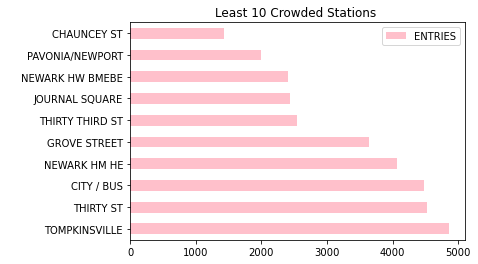

In [70]:
stations_and_entries.sort_values('ENTRIES',ascending=False).tail(10).plot.barh(title='Least 10 Crowded Stations ',color='Pink', xlabel=' ',ylabel='total crowd' )

<AxesSubplot:title={'center':'Top 10 Crowded Stations'}, ylabel=' '>

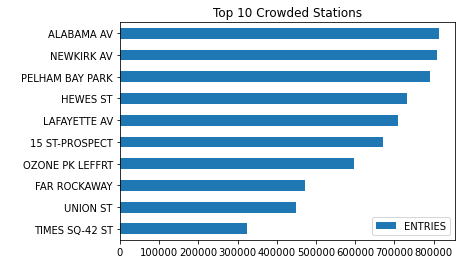

In [86]:
stations_and_entries.sort_values('ENTRIES').tail(10).plot.barh(title='Top 10 Crowded Stations', xlabel=' ',ylabel='total crowd')
